# 02 Linear Regression

## Importing data

In [28]:
#!pip3 install sklearn

In [24]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [34]:
# Importing the dataset
df = pd.read_csv('market_prep.csv', sep=';')
df

,Education,Marital_Status,Income,Kidhome,Recency,NumWebVisitsMonth,Complain,all_Response,Age,CustomerDayLong,MNT,all_Purchases
0,2,4,58138.0,0,58,7.0,0.0,1.0,64.0,3314,1617.000000,25.0
1,2,4,46344.0,1,38,5.0,0.0,0.0,67.0,2764,27.000000,6.0
2,2,5,71613.0,0,26,4.0,0.0,0.0,56.0,2963,776.000000,21.0
3,2,5,26646.0,1,26,6.0,0.0,0.0,37.0,2790,53.000000,8.0
4,4,3,58293.0,1,94,5.0,0.0,0.0,40.0,2812,422.000000,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,61223.0,0,46,5.0,0.0,0.0,54.0,3032,1294.524192,18.0
2236,4,5,64014.0,2,56,7.0,0.0,1.0,75.0,2670,444.000000,22.0
2237,2,2,56981.0,0,91,6.0,0.0,1.0,40.0,2806,1241.000000,19.0
2238,3,5,69245.0,0,8,3.0,0.0,0.0,65.0,2807,843.000000,23.0


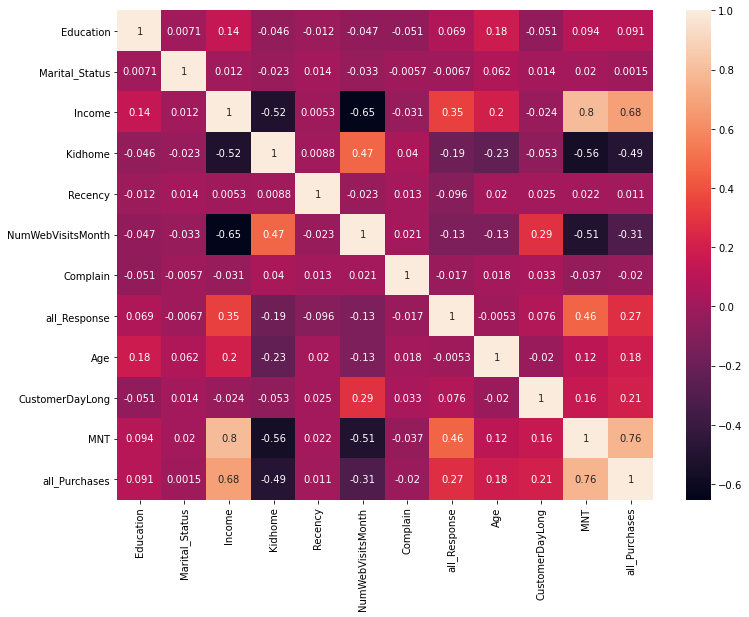

In [35]:

# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

## Splitting

Цель прогнозирования на данном этапе - прогноз дохода покупателей от предоставленных параметров.

In [47]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, [0,5,7,8,10,11]]
y = df['Income']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Simple Linear Regression

In [48]:
# Fitting Simple Linear Regression to the Training set Income from MNT
f1 = ['MNT']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)

# Getting parameters
sr.coef_, sr.intercept_

(array([28.24673401]), 34786.483166332735)

In [49]:

# Predicting the Test set results
y_pred = sr.predict(X_test[f1])

# Coefficient of determination R^2
sr.score(X_train[f1], y_train).round(3)

0.632

In [50]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[f1]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(12893.67, 11865.33)

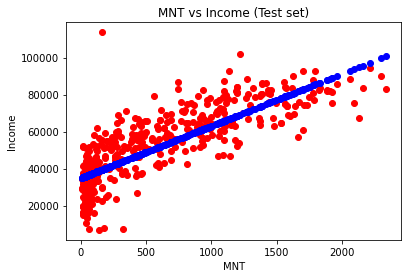

In [51]:
# Visualising the Test set results
plt.scatter(X_test['MNT'], y_test, color = 'red')
plt.plot(X_test['MNT'], sr.predict(X_test[f1]), 'bo')
plt.title('MNT vs Income (Test set)')
plt.xlabel('MNT')
plt.ylabel('Income')
plt.show()

## Multiple Linear Regression

In [52]:
#!pip3 install statsmodels

In [53]:
# Fitting Multiple Regression
mr = LinearRegression().fit(X_train, y_train)

# Coefficient of determination R^2
mr.score(X_train, y_train).round(3)

0.749

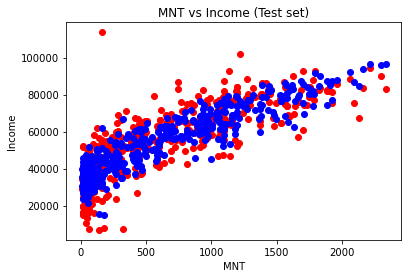

In [54]:
# Visualising the Test set results
plt.scatter(X_test['MNT'], y_test, color = 'red')
plt.plot(X_test['MNT'], mr.predict(X_test), 'bo')
plt.title('MNT vs Income (Test set)')
plt.xlabel('MNT')
plt.ylabel('Income')
plt.show()

In [55]:

# Checking p-values
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X1).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     886.8
Date:                Sun, 14 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:16:43   Log-Likelihood:                -19161.
No. Observations:                1792   AIC:                         3.834e+04
Df Residuals:                    1785   BIC:                         3.838e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.291e+04   1526.527     28.108      0.000    3.99e+04    4.59e+04
Education          1239.3421    228.366      5.427      0.000     791.449    1687.236
NumWebVisitsMonth -3288.4466    128.040    -25.683      0.000   -3539.570   -3037.323
all_Response       1157.7930    358.895      3.226      0.001     453.894    1861.692
Age                  97.9691     22.475      4.359      0.000      53.889     142.049
MNT                  14.5926      0.804     18.142      0.000      13.015      16.170
all_Purchases       614.1635     53.448     11.491      0.000     509.336     718.991
==============================================================================
Omnibus:                      566.527   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8203.390
Skew:                           1.074   Prob(JB):                         0.00
Kurtosis:                      13.259   Cond. No.                     5.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R^2 достаточно высокий чтобы считать, что модель достаточно хорошо описывает данные.
По критерию t не имеют особого значения, такие поля как: Marital_Status, Kidhome, Recency, Complain и CustomerDayLong.

## Recursive feature elimination

In [56]:
# Feature ranking with recursive feature elimination
from sklearn.feature_selection import RFE
n_features = X.shape[1]
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select = 3)
selector = selector.fit(X, y)

# Selected Features
selected_columns=[]
for i in range(n_features):
    if selector.support_[i] == True:
        selected_columns.append(i)
        
f_lm = []
for column in selected_columns:
    f_lm.append(X.columns[column])

In [57]:

# Fitting Optimized Multiple Regression
mr_rfe = LinearRegression().fit(X_train[f_lm], y_train)

# Getting parameters
mr_rfe.coef_, mr_rfe.intercept_

(array([-4400.74916979,  3929.21719817,  1347.16541993]), 53669.10077521864)

In [58]:
# Predicting the Test set results
y_pred = mr_rfe.predict(X_test[f_lm])

# Coefficient of determination R^2
mr_rfe.score(X_train[f_lm], y_train).round(3)

0.695

In [59]:
# Mean squared error
mean_squared_error(y_train, mr_rfe.predict(X_train[f_lm]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(11744.88, 10872.53)

R^2 в сравнении с прошлой моделью не сильно уменьшился, что в данном случае не есть критично, а вот ошибки немного снизились.

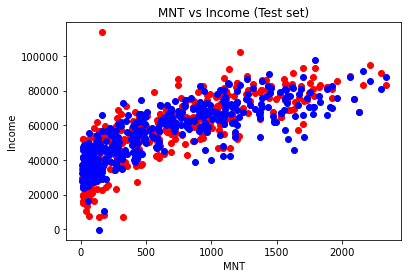

In [60]:
# Visualising the Test set results
plt.scatter(X_test['MNT'], y_test, color = 'red')
plt.plot(X_test['MNT'], mr_rfe.predict(X_test[f_lm]), 'bo')
plt.title('MNT vs Income (Test set)')
plt.xlabel('MNT')
plt.ylabel('Income')
plt.show()

## Backward Elimination

In [61]:
# Backward Elimination with p-values
def backwardElimination(x, y, sl):
    x = sm.add_constant(x)
    numVars = x.shape[1]
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = x.drop(x.columns[j], axis=1)
    regressor_OLS.summary()
    return x

SL = 0.0001
X_Modeled = backwardElimination(X_train, y_train, SL)

In [62]:
# Fitting Optimized Multiple Regression
mr_be = LinearRegression().fit(X_Modeled, y_train)

# Coefficient of determination R^2
mr_be.score(X_Modeled, y_train).round(3)

0.747

## Polynomial Regression

In [63]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)

pr = LinearRegression().fit(X_train_p, y_train)

# Getting parameters
pr.coef_, pr.intercept_

(array([ 2.21133772e+11,  2.25689001e+03, -5.30949519e+03,  6.45802694e+01,
         5.94371666e+02,  4.31187795e+01, -7.84698966e+01,  2.50086016e+02,
         4.42994074e+01, -2.87224857e+02,  2.13338822e+00,  8.97454361e-02,
        -1.76182560e+02,  1.54803840e+02, -2.39538532e+02, -7.09606850e+00,
         9.75993210e-01,  3.05942093e+01,  9.92679350e+02,  3.29224390e+01,
        -2.92092916e+00,  1.43773315e+02, -3.01726172e+00, -1.01291039e-01,
        -7.46106075e+00, -4.53104347e-03, -7.96765317e-01,  3.94834862e+01]),
 -221133738016.70856)

In [64]:
# Predicting the Test set results
y_pred = pr.predict(X_test_p)

# Coefficient of determination R^2
pr.score(X_train_p, y_train).round(3)

0.773

In [66]:
# Mean squared error
mean_squared_error(y_train, pr.predict(X_train_p), squared=False).round(3), mean_squared_error(y_test, y_pred, squared=False).round(3)

(10122.03, 9873.027)

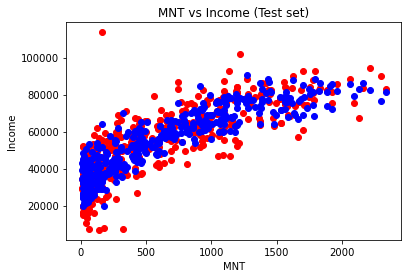

In [67]:
# Visualising the Test set results
plt.scatter(X_test['MNT'], y_test, color = 'red')
plt.plot(X_test['MNT'], pr.predict(X_test_p), 'bo')
plt.title('MNT vs Income (Test set)')
plt.xlabel('MNT')
plt.ylabel('Income')
plt.show()

Что и следовало ожидать - полиномиальная модель лучше расмотренных ранее описывает данные, если в оценке опираться на R^2 и ошибки тестовой группы и основной.

## Pickle

In [69]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()